In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import BaggingClassifier

In [6]:
#Here I want to test some regressors

import numpy as np
import h5py
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

In [7]:
#alright now I'm going to try to apply to data

f = h5py.File('../halo_1107_Z13/halo_1107_Z13_particles.hdf5')

print f.keys()

h = 0.675

parts = f['PartType1']
print parts.keys()

[u'PartType1']
[u'Coordinates', u'Masses', u'ParticleIDs', u'Stellar_Masses', u'Velocities']


In [8]:
coords = parts['Coordinates'][:]/h
vel = parts['Velocities'][:]
mass= parts['Masses'][:]*1.0e10/h
ids = parts['ParticleIDs'][:]
star_mass = parts['Stellar_Masses'][:]

print star_mass

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [9]:
np.sum(star_mass)

1314879.0

In [10]:
host_cen = np.array([37.53820323, 34.52403051, 37.02327211])*1000.0/h
host_vel = np.array([ 57.161152, -83.112122, -17.277088])

coord_diff = np.subtract(coords,host_cen)
vel_diff = np.subtract(vel,host_vel)

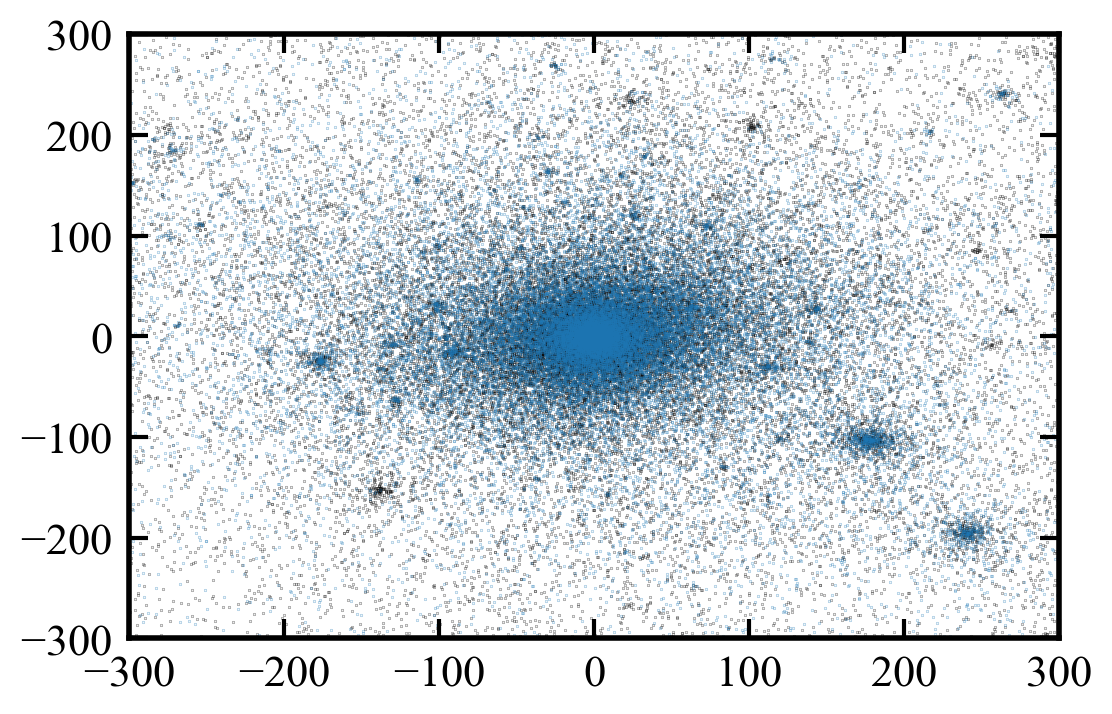

In [80]:
star_mask = (np.ndarray.flatten(star_mass)>0.0)

plt.scatter(coord_diff[:,0][::1000],coord_diff[:,1][::1000],s=0.01,color='k')
plt.scatter(coord_diff[:,0][star_mask][::1000],coord_diff[:,1][star_mask][::1000],s=0.01)
plt.xlim([-300.0,300.0])
plt.ylim([-300.0,300.0])
plt.savefig('./fig_1.png',bbox_inches='tight')
plt.show()

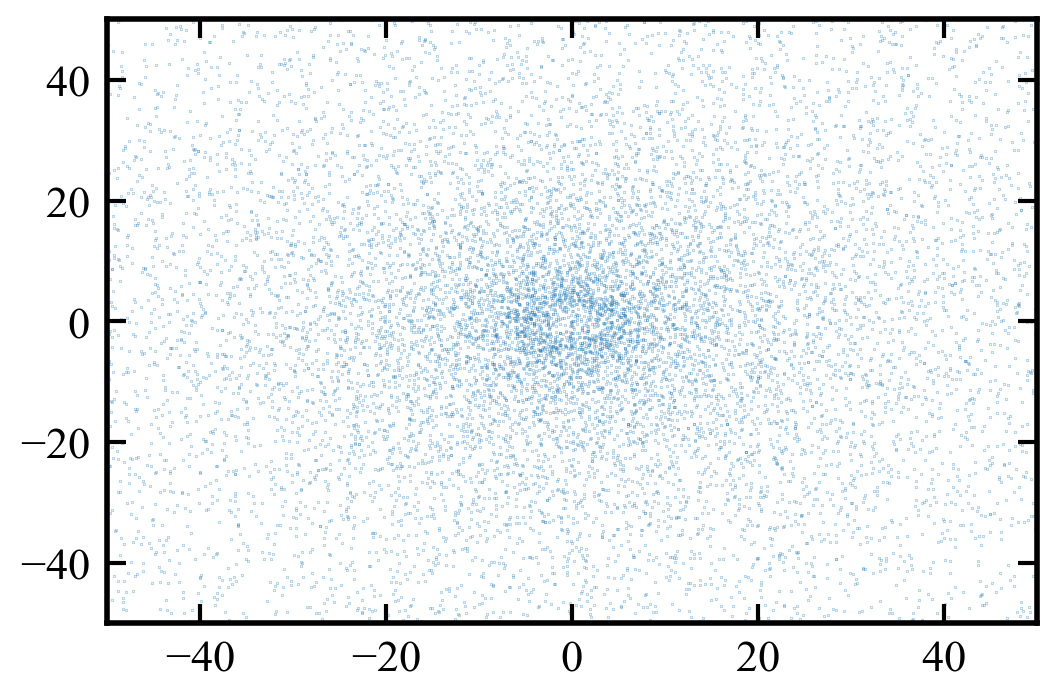

In [9]:
plt.scatter(coord_diff[:,0][star_mask][::1000],coord_diff[:,1][star_mask][::1000],s=0.01)
plt.xlim([-50.0,50.0])
plt.ylim([-50.0,50.0])
plt.show()

In [49]:
np.min(star_gal[star_gal!=0.0])

2.9802322e-08

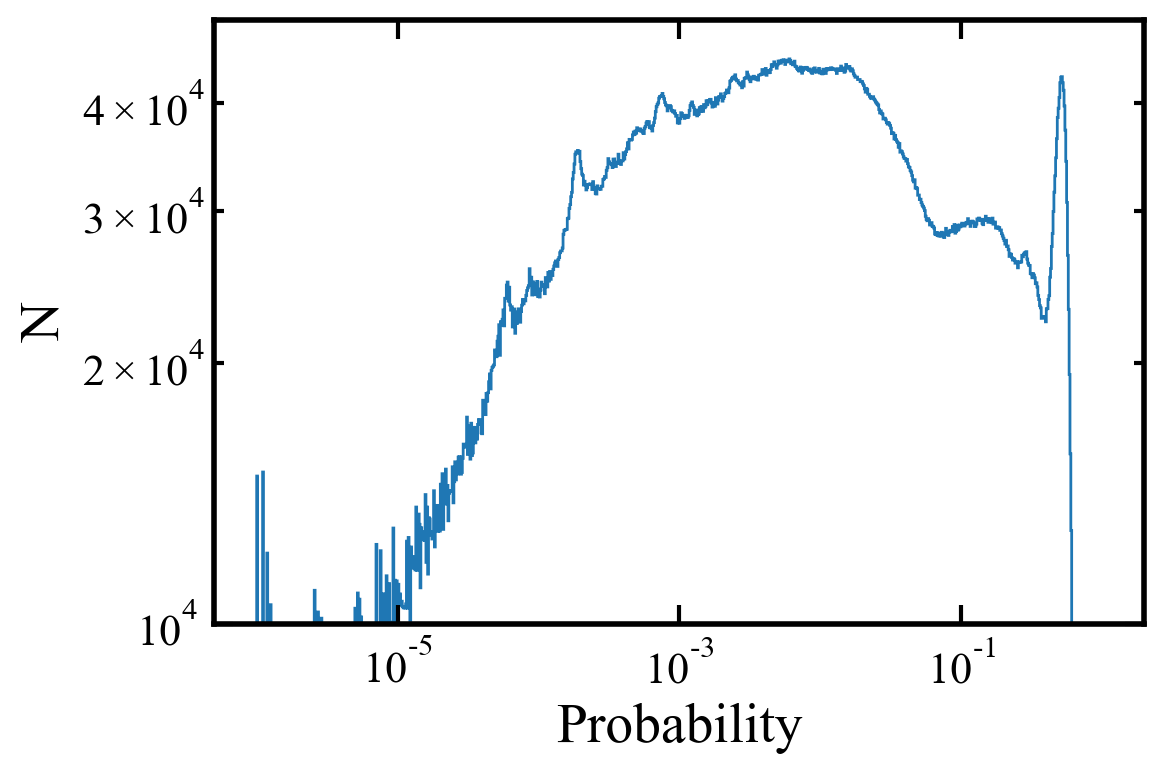

In [72]:
plt.hist(star_gal,bins=np.logspace(-6.0,0.0,1000),histtype='step')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Probability',fontsize=20)
plt.ylabel('N',fontsize=20)
plt.ylim([1.0e4,5.0e4])
plt.savefig('./fig_2.png',bbox_inches='tight')
plt.show()

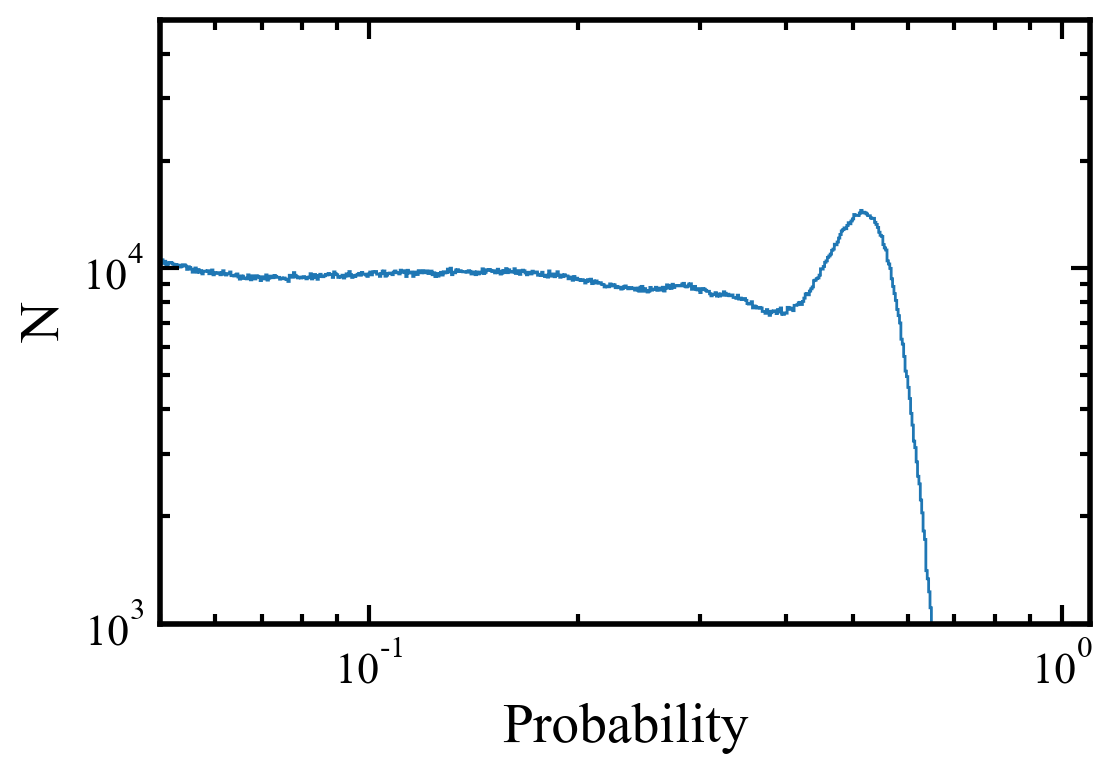

In [74]:
plt.hist(star_gal,bins=np.logspace(-2.0,0.0,1000),normed=False,histtype='step')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Probability',fontsize=20)
plt.ylabel('N',fontsize=20)
plt.ylim([1.0e3,5.0e4])
plt.xlim([5.0e-2,1.1])
plt.savefig('./fig_3.png',bbox_inches='tight')
plt.show()

In [16]:
dist = np.linalg.norm(coord_diff,axis=1)
dist_gal = dist[(dist<300.0)]
star_gal = np.ndarray.flatten(star_mass)[dist<300.0]

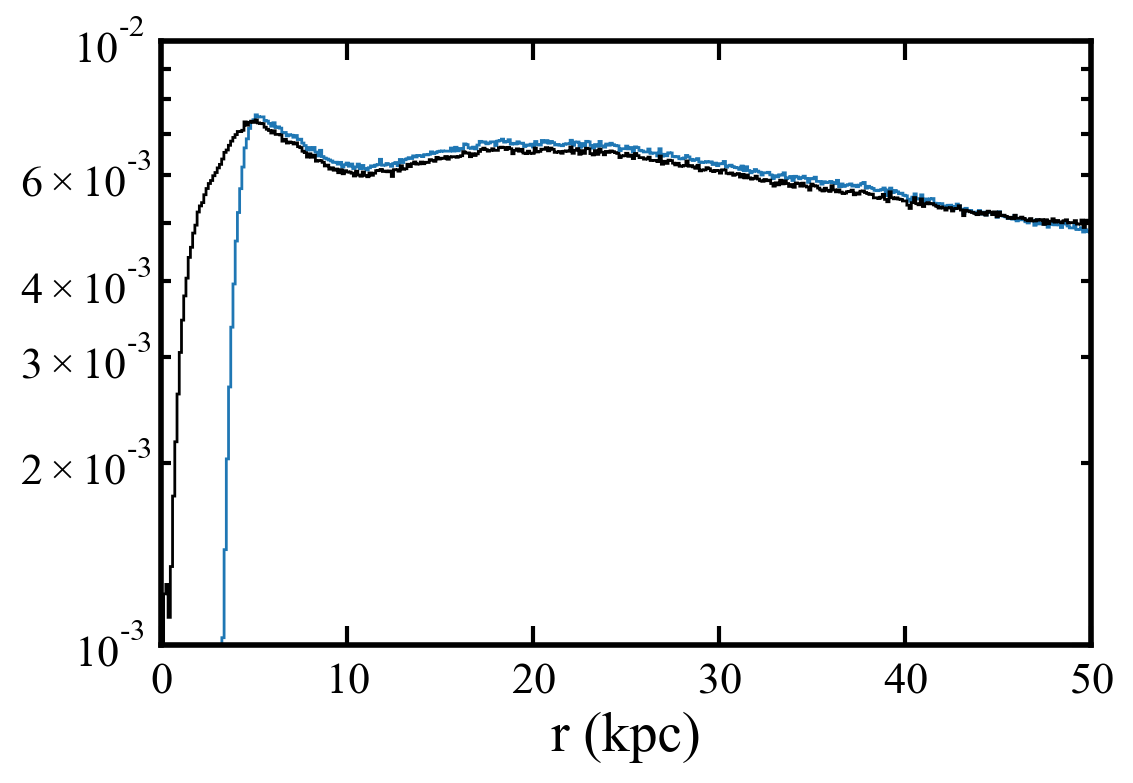

In [75]:
plt.hist(dist_gal[(star_gal>0.0)],bins=2500,normed=True,histtype='step')
plt.hist(dist_gal,bins=2500,normed=True,histtype='step',color='k')
plt.yscale('log')
plt.xlim([0.0,50.0])
plt.ylim([1.0e-3,1.0e-2])
plt.xlabel('r (kpc)',fontsize=20)
plt.savefig('./fig_4.png',bbox_inches='tight')
plt.show()

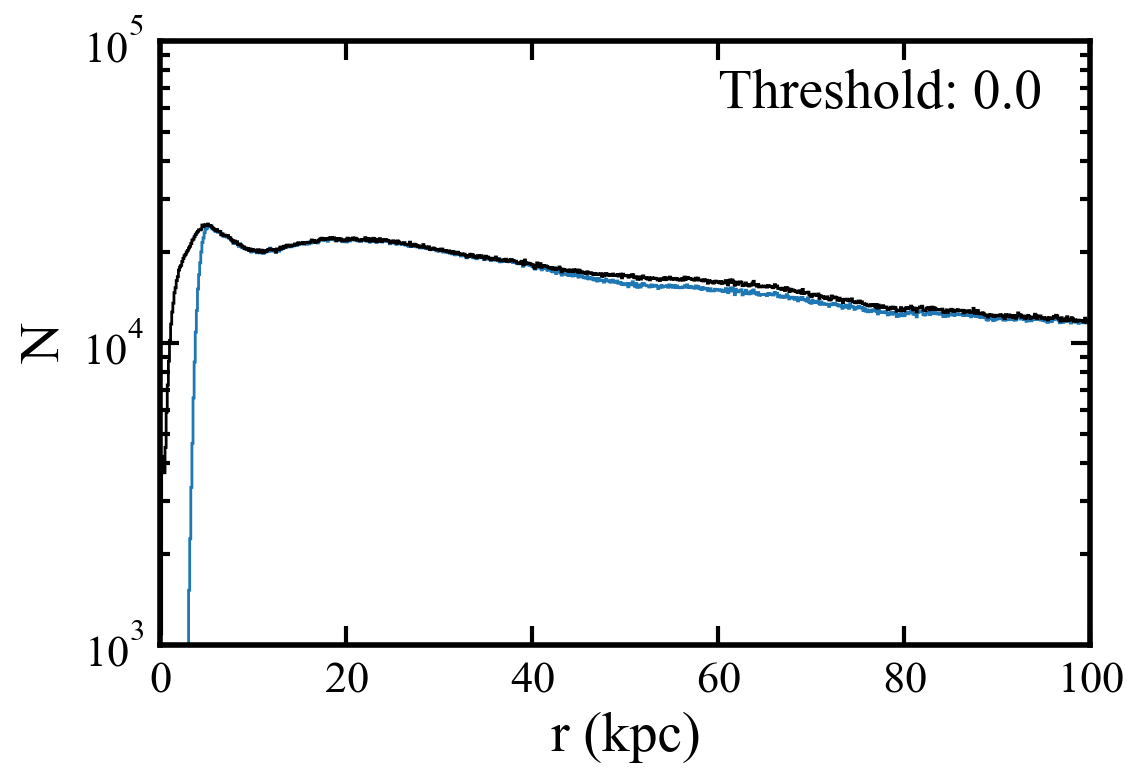

In [76]:
threshold = 0.0
plt.hist(dist_gal[(star_gal>threshold)],bins=2500,normed=False,histtype='step')
plt.hist(dist_gal,bins=2500,normed=False,histtype='step',color='k')
plt.yscale('log')
plt.xlim([0.0,100.0])
plt.ylim([1.0e3,1.0e5])
plt.xlabel('r (kpc)',fontsize=20)
plt.ylabel('N',fontsize=20)
plt.text(60.0,6.0e4,'Threshold: {}'.format(threshold),fontsize=20)
plt.savefig('./fig_5.png',bbox_inches='tight')
plt.show()

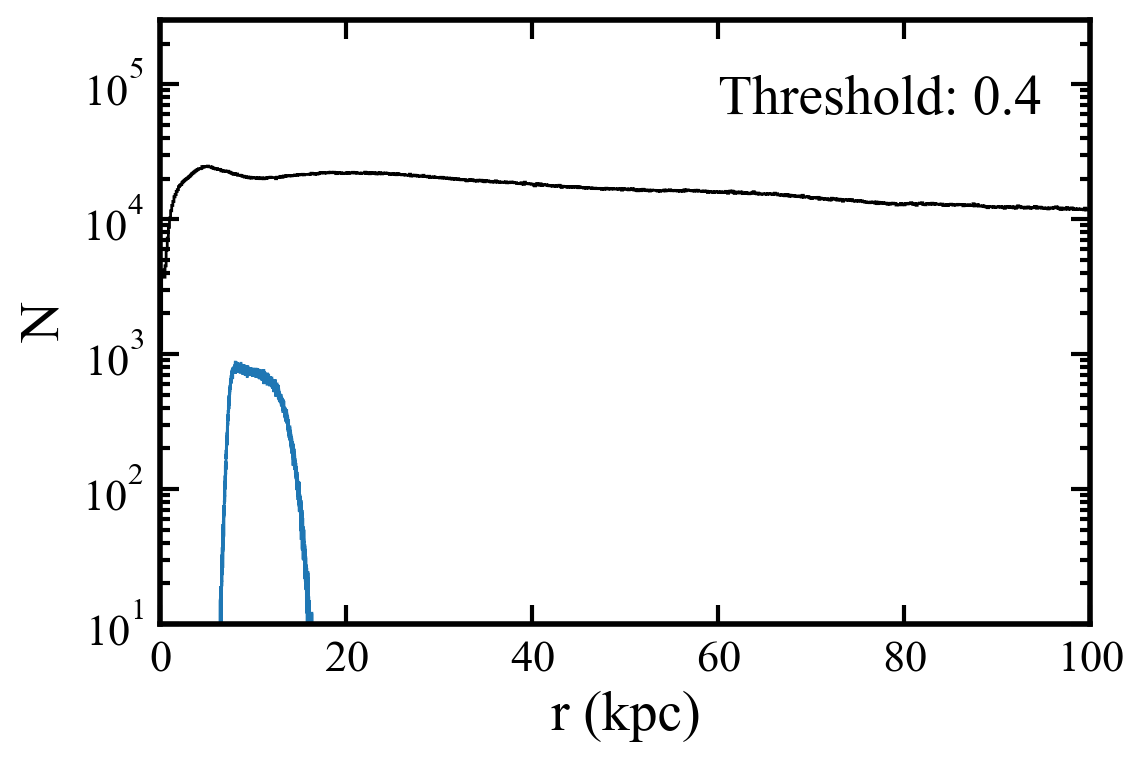

In [77]:
threshold = 0.4
plt.hist(dist_gal[(star_gal>threshold)],bins=2500,normed=False,histtype='step')
plt.hist(dist_gal,bins=2500,normed=False,histtype='step',color='k')
plt.yscale('log')
plt.xlim([0.0,100.0])
plt.ylim([1.0e1,3.0e5])
plt.xlabel('r (kpc)',fontsize=20)
plt.ylabel('N',fontsize=20)
plt.text(60.0,6.0e4,'Threshold: {}'.format(threshold),fontsize=20)
plt.savefig('./fig_6.png',bbox_inches='tight')
plt.show()

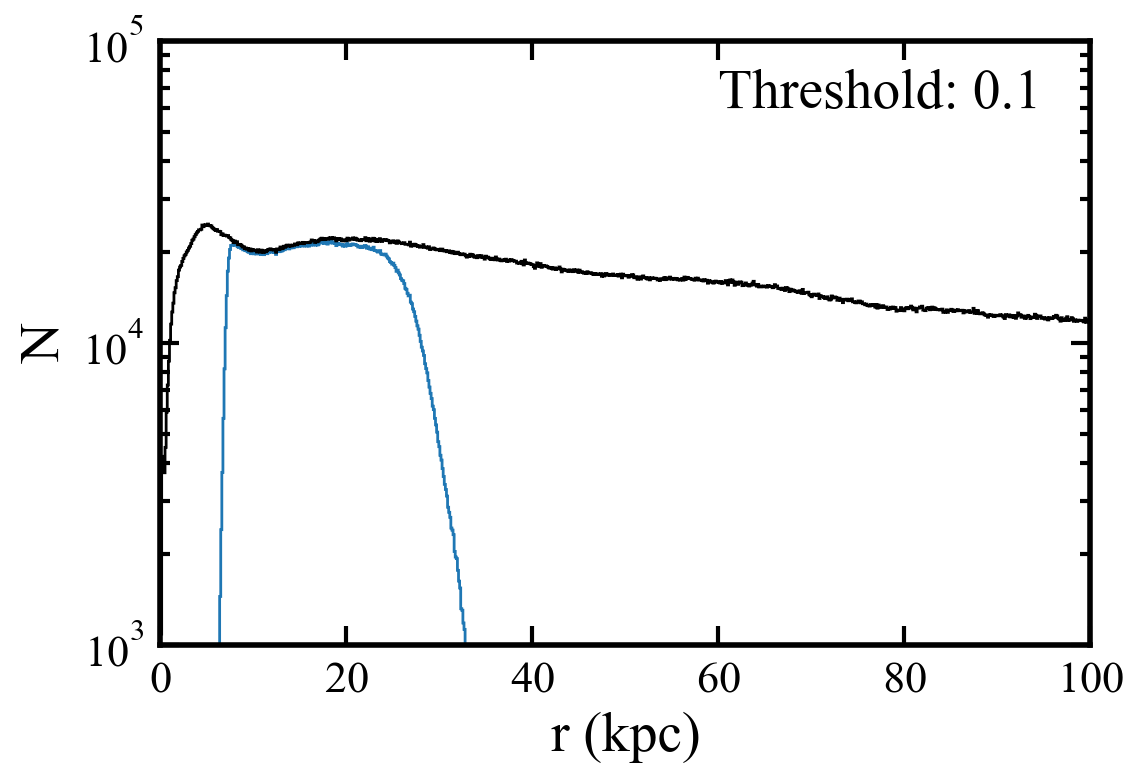

In [78]:
threshold = 0.1
plt.hist(dist_gal[(star_gal>threshold)],bins=2500,normed=False,histtype='step')
plt.hist(dist_gal,bins=2500,normed=False,histtype='step',color='k')
plt.yscale('log')
plt.xlim([0.0,100.0])
plt.ylim([1.0e3,1.0e5])
plt.xlabel('r (kpc)',fontsize=20)
plt.ylabel('N',fontsize=20)
plt.text(60.0,6.0e4,'Threshold: {}'.format(threshold),fontsize=20)
plt.savefig('./fig_7.png',bbox_inches='tight')
plt.show()

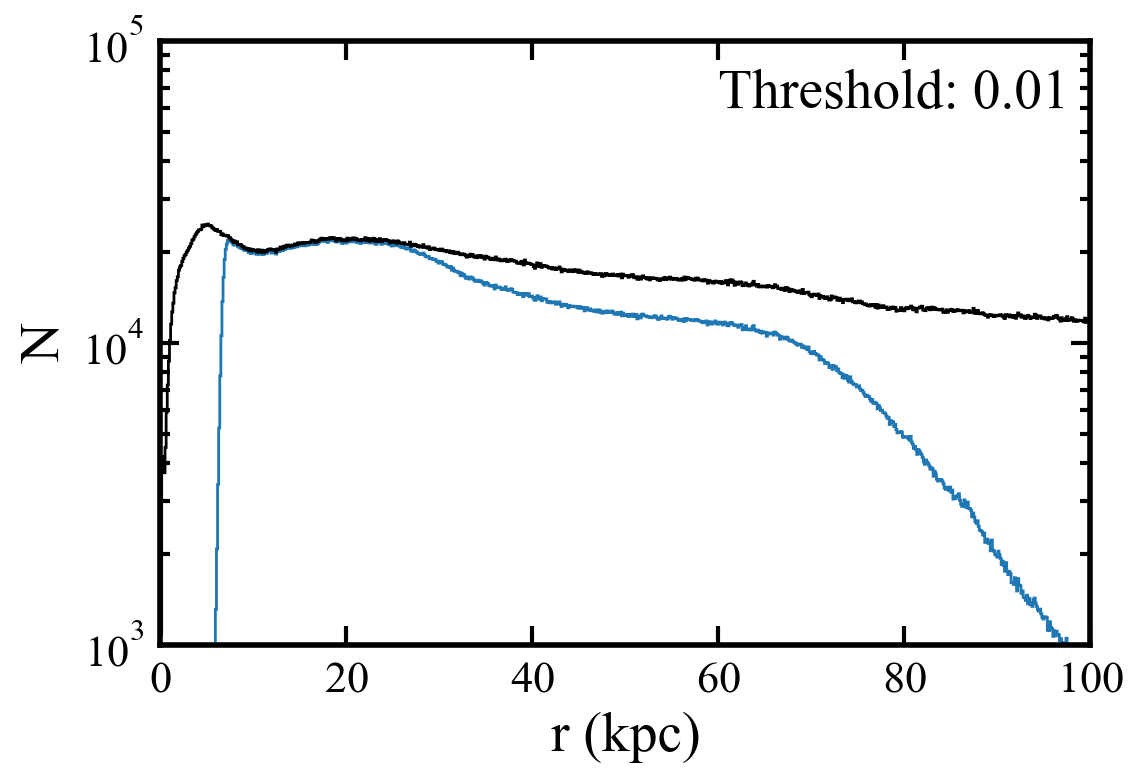

In [79]:
threshold = 1.0e-2
plt.hist(dist_gal[(star_gal>threshold)],bins=2500,normed=False,histtype='step')
plt.hist(dist_gal,bins=2500,normed=False,histtype='step',color='k')
plt.yscale('log')
plt.xlim([0.0,100.0])
plt.ylim([1.0e3,1.0e5])
plt.xlabel('r (kpc)',fontsize=20)
plt.ylabel('N',fontsize=20)
plt.text(60.0,6.0e4,'Threshold: {}'.format(threshold),fontsize=20)
plt.savefig('./fig_8.png',bbox_inches='tight')
plt.show()

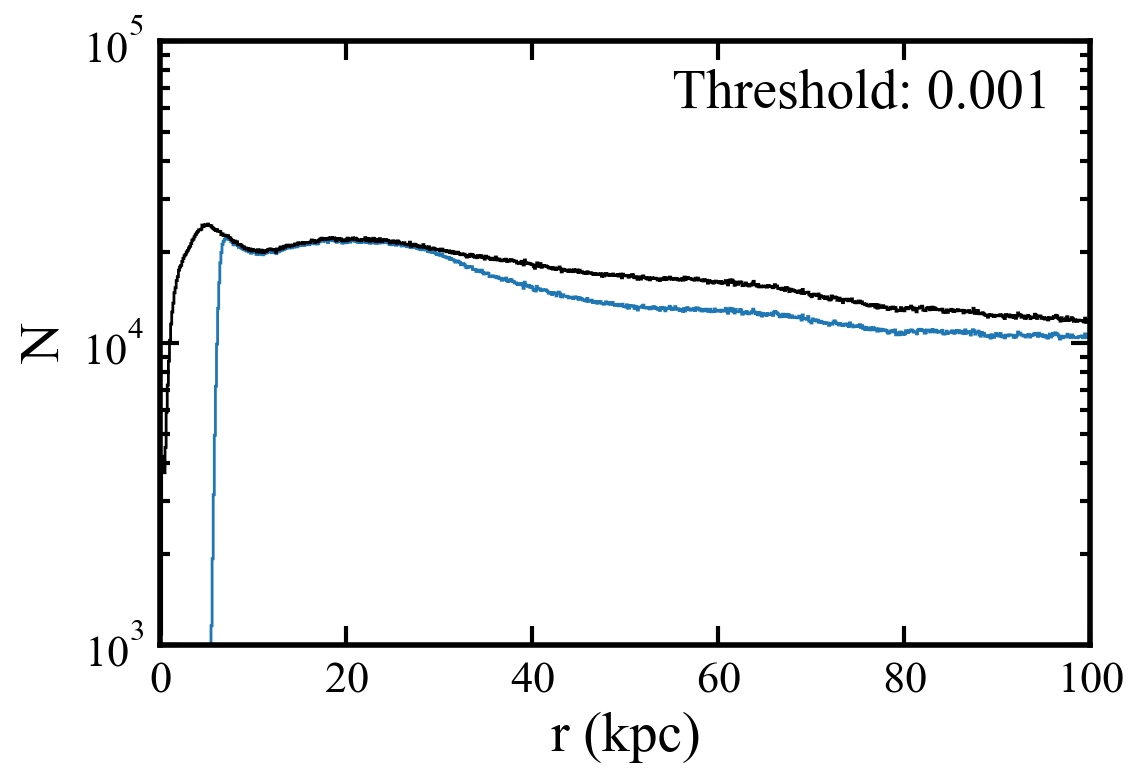

In [39]:
threshold = 1.0e-3
plt.hist(dist_gal[(star_gal>threshold)],bins=2500,normed=False,histtype='step')
plt.hist(dist_gal,bins=2500,normed=False,histtype='step',color='k')
plt.yscale('log')
plt.xlim([0.0,100.0])
plt.ylim([1.0e3,1.0e5])
plt.xlabel('r (kpc)',fontsize=20)
plt.ylabel('N',fontsize=20)
plt.text(55.0,6.0e4,'Threshold: {}'.format(threshold),fontsize=20)
plt.show()